In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import cmath

In [3]:
import cv2
from scipy.integrate import quad

### Ques1

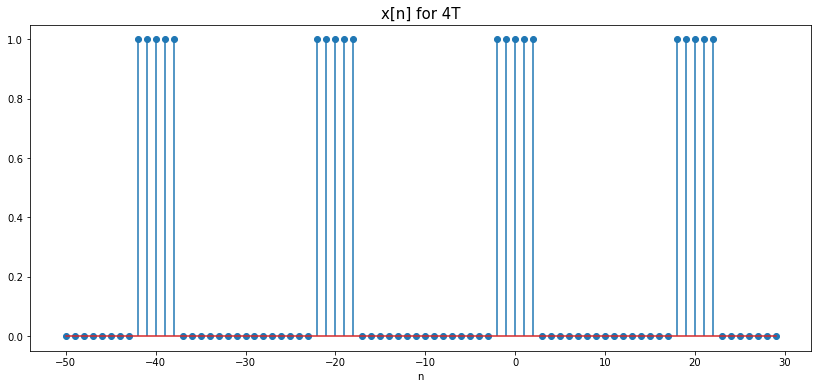

In [4]:
def q1_fn(n):
    return 1*(-2 <= n <= 2)
n0=np.arange(-10,10,1)
nf=np.arange(-40,40,1)
res= [q1_fn(i) for i in n0]
plt.rcParams["figure.figsize"] = (14,6)
plt.stem(nf-10,4*res)
plt.xlabel('n' )
plt.title('x[n] for 4T' , size = 15 )
plt.show()

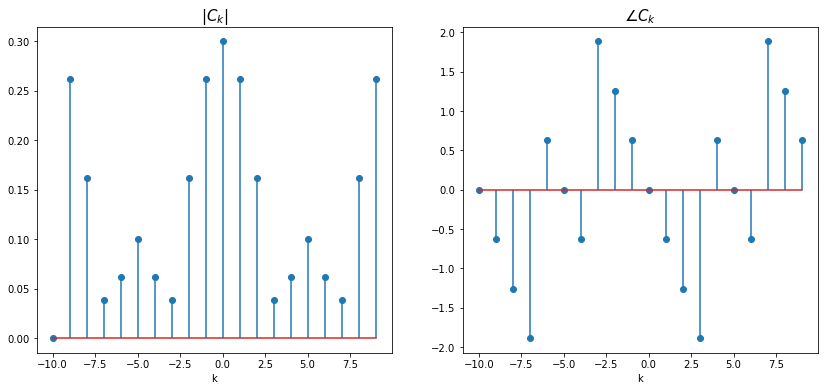

In [28]:
#function for dtfs coeff
def DTFS(n,x,N):
    ck = np.zeros(len(n),dtype='complex')
    for k in range(N):
        for i in range(N):
            ck[n==k] += x[i]*np.exp(-1j*k*2*np.pi*i/N)
        ck[n==(0-k)] = np.conj(ck[n==k])
    ck = ck/N
    return ck
N=10
n=np.arange(-N,N,1)

#res1=np.array([1,1,1,0,0])
res1=np.array(res[-10:])
dtfs_res=DTFS(n,res1,N)


plt.subplot(121)
plt.stem(n,abs(dtfs_res))  # magnitude
plt.xlabel('k')
plt.title('$|C_k|$',size=15 )

plt.subplot(122)
plt.stem(n,np.angle(dtfs_res))  #phase
plt.xlabel('k')
plt.title(r'$\angle C_k$',size=15)
plt.show()

### Ques2

In [29]:
#function for inverse dtfs
def IDTFS(n,ck,M):
    N=len(ck)
    xn = np.zeros(len(n),dtype='complex')
    for k in range(N):
        for i in range(M):
            xn[n==k] += ck[i]*np.exp(1j*k*2*np.pi*i/N)
        xn[n==(0-k)] = xn[n==k]
    return xn

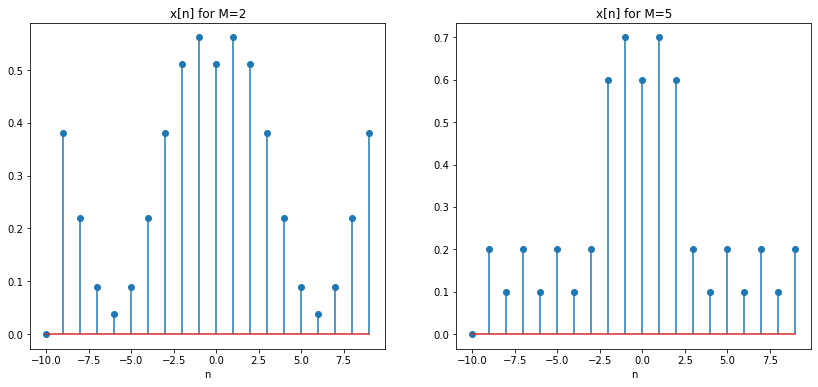

In [56]:
ckres=dtfs_res[-N:]
idtfs3=IDTFS(n,ckres,2)
idtfs4=IDTFS(n,ckres,5)

plt.subplot(121)
plt.stem(n,idtfs3)
plt.xlabel('n')
plt.title('x[n] for M=2')

plt.subplot(122)
plt.stem(n,idtfs4)
plt.xlabel('n')
plt.title('x[n] for M=5')
plt.show()

### Ques3

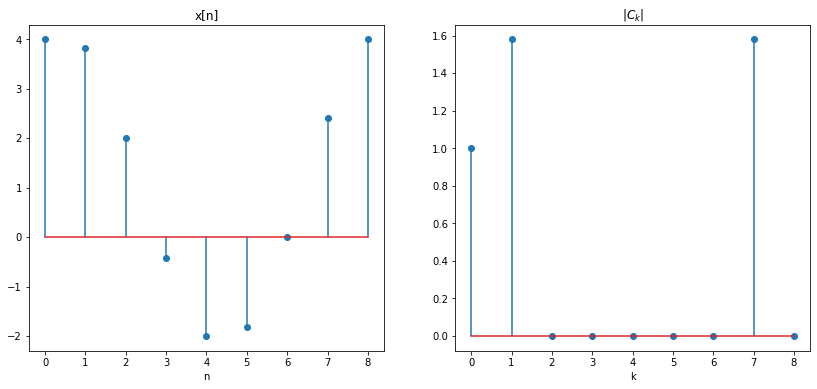

In [31]:
def q3f(n):
    N=8
    return 1+np.sin(2*np.pi*n/N)+3*np.cos(2*np.pi*n/N)
n3=np.arange(0,9,1)
x3n=q3f(n3)
dt3=DTFS(n3,x3n,8)  #DTFS

plt.subplot(121)
plt.stem(q3f(n3))
plt.xlabel('n')
plt.title('x[n]')

plt.subplot(122)
plt.stem(abs(dt3))
plt.xlabel('k')
plt.title('$|C_k|$')
plt.show()

In [32]:
lhs,rhs=0,0
for i in range(8):
    lhs+=(q3f(i)**2)/8   ## x^2/N
    rhs+=abs(dt3[i])**2   ## Ck^2
print(lhs)
print(rhs)

6.0
6.000000000000002


### Ques4

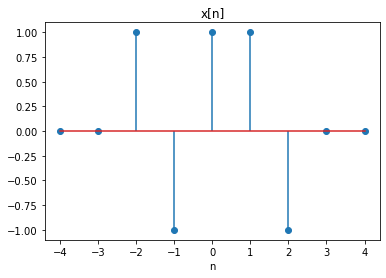

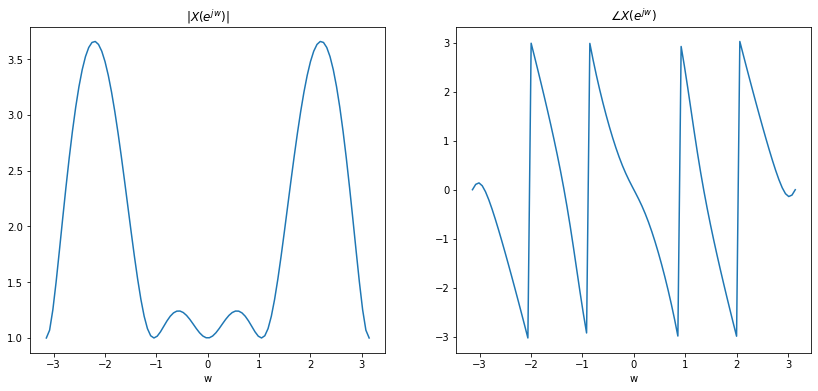

In [55]:
#function for dtft
def dtft(x,w):
    X=np.zeros(len(w),dtype='complex')
    for i in range(len(x)):
        for k in range(len(w)):
            X[k] +=x[i]*np.exp(-1j*w[k]*i)
    return X

def q4f(n):
    if n in (-2,0,1):
        return 1
    if n in (-1,2):
        return -1
    else: return 0
    
w=np.linspace(-np.pi,np.pi,100)
n4=np.arange(-4,5,1)  
res4=[q4f(i) for i in n4]
q4r=dtft(res4,w)

plt.figure(figsize=(6,4))
plt.stem(n4,res4)
plt.xlabel('n')
plt.title('x[n]')
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w,abs(q4r))
plt.xlabel('w')
plt.title(r'$\|X(e^{jw})|$')

plt.subplot(122)
plt.plot(w,np.angle(q4r))
plt.xlabel('w')
plt.title(r'$\angle X(e^{jw})$' )
plt.show()

### Ques5

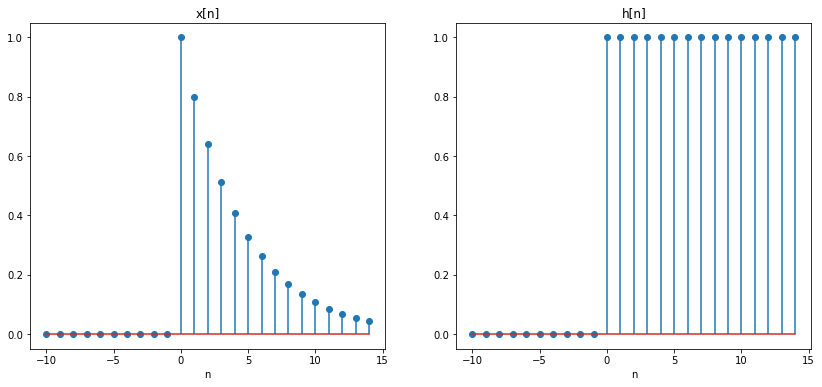

In [34]:
def u(n):
    if n<0:
        return 0
    else:
        return 1
def q5f(n):
    return (0.8**n)*u(n)
def convolution(x,h):
        len_x=np.size(x)
        len_h=np.size(h)
        C = np.zeros(len_x + len_h -1)
        for m in np.arange(len_x):
            for n in np.arange(len_h):
                C[m+n] = C[m+n] + x[m]*h[n]
        return C 
n5=np.arange(-10,15,1)
hres=[u(i) for i in n5]
xres=[q5f(i) for i in n5]
plt.subplot(121)
plt.stem(n5,xres)
plt.xlabel('n')
plt.title('x[n]')

plt.subplot(122)
plt.stem(n5,hres)
plt.xlabel('n')
plt.title('h[n]')
plt.show()

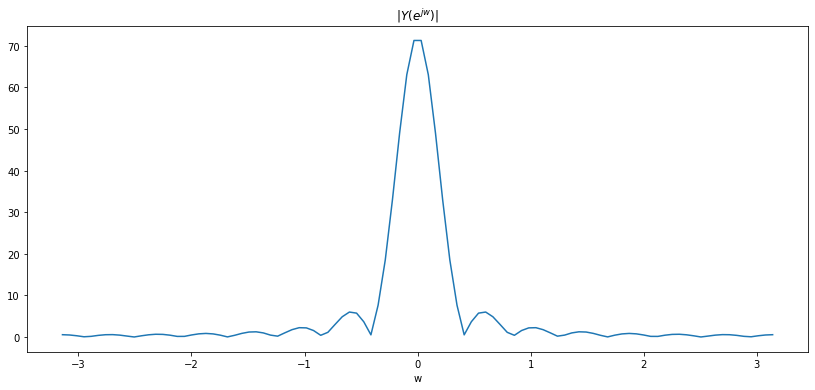

In [35]:
w5=np.linspace(-np.pi,np.pi,100)
x5dtft=dtft(xres,w5)
h5dtft=dtft(hres,w5)
y5=x5dtft*h5dtft
plt.figure(figsize=(14,6))
plt.plot(w5,abs(y5))
plt.xlabel('w')
plt.title(r'$\|Y(e^{jw})|$')
plt.show()

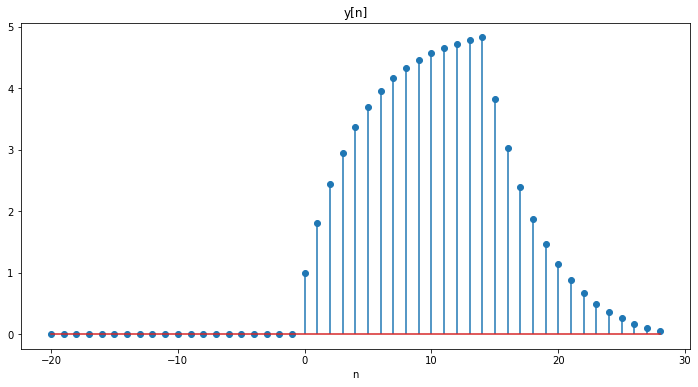

In [36]:
q5y=convolution(xres,hres)
ll=2*min(n5)
ul=2*max(n5)
ncon=np.arange(ll,ul+1,1)
plt.figure(figsize=(12,6))
plt.stem(ncon,q5y)
plt.xlabel('n')
plt.title('y[n]')
plt.show()

### Ques6

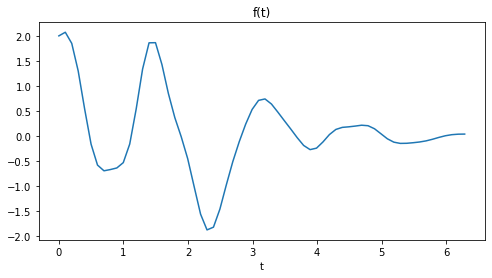

In [37]:
def q6f(t):
    return np.exp(-(t**2)/10)*((np.sin(2*t))+(2*np.cos(4*t))+(0.4*np.sin(t)*np.sin(10*t)))
t6=np.linspace(0,2*np.pi,64)
plt.figure(figsize=(8,4))
plt.plot(t6,q6f(t6))
plt.xlabel('t')
plt.title('f(t)')
plt.show()

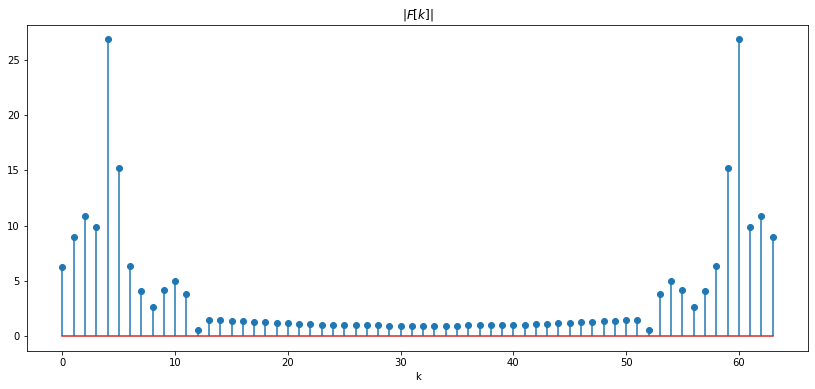

In [57]:
#DFT Matrix
def dftmat(N):
    i,k=np.meshgrid(np.arange(N),np.arange(N))
    w=np.exp(-2*np.pi*1j/N)
    W=np.power(w,i*k)/N*N
    return W
q6w=dftmat(64)
q6res=q6w.dot(q6f(t6))
plt.stem(abs(q6res))
plt.xlabel('k')
plt.title(r'$\|F[k]|$')
plt.show()

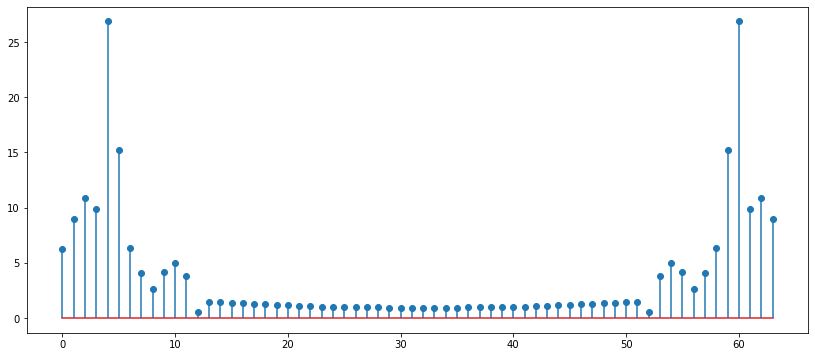

In [39]:
r6=q6f(t6)
dft6=np.fft.fft(r6)
plt.stem(abs(dft6))
plt.show()

### Ques7

In [40]:
def q7f(n):
    return (((-1/3)**n)*(n>=0))-(((1/2)**n)*(n<-1))
 
n7=np.arange(-5,5,1)
q7r=q7f(n7)

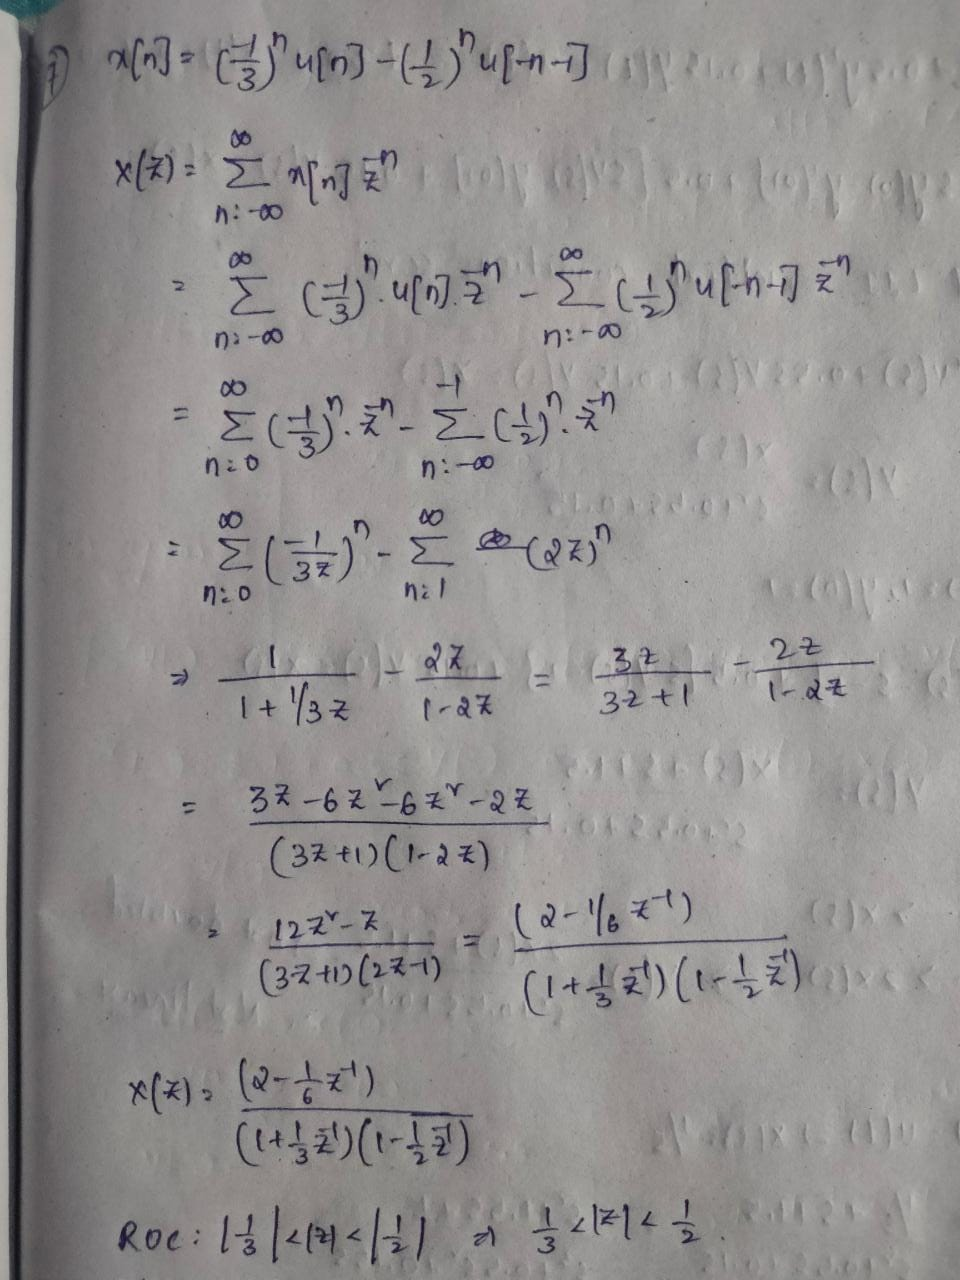

In [41]:
from IPython.display import Image
Image(filename='Q7img.jpeg',width=400, height=200)

In [42]:
w7=np.linspace(-np.pi,np.pi,100)
z = np.exp(1j*w7)
num=(2 - 1/(6*z))
den=(1+(1/(3*z))) * (1-(1/(2*z)))
q7_z =  num/den 

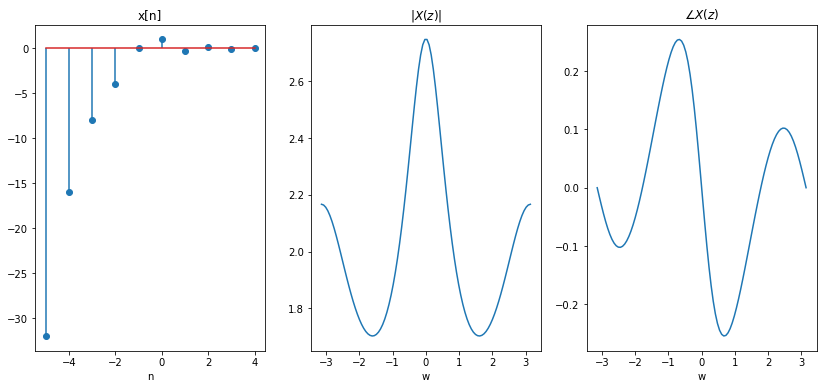

In [43]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.stem(n7,q7r)
plt.xlabel('n')
plt.title('x[n]')

plt.subplot(132)
plt.plot(w7,abs(q7_z))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(133)
plt.plot(w7,np.angle(q7_z))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

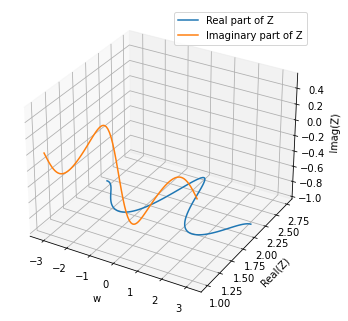

In [46]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(121,projection='3d')
ax.plot(w7,np.real(q7_z),np.zeros(len(w7))-1,label='Real part of Z')
ax.plot(w7,np.zeros(len(w7))+1,np.imag(q7_z),label='Imaginary part of Z')
ax.set_xlabel('w')
ax.set_ylabel('Real(Z)')
ax.set_zlabel('Imag(Z)')
ax.legend()

In [ ]:
#7b

### Ques8

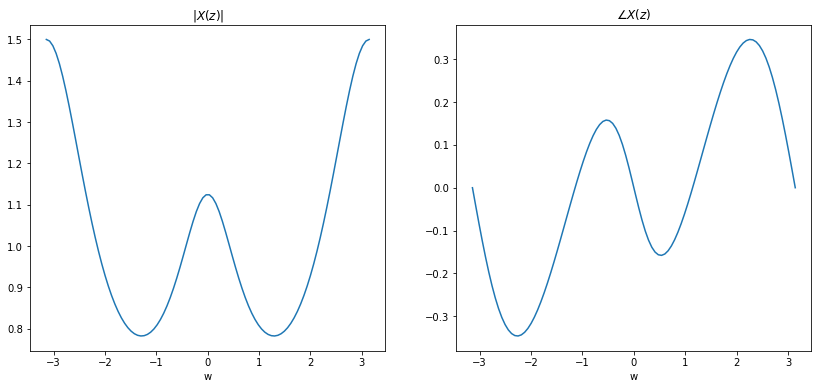

In [47]:
def h8f(w):
    z=np.exp(1j*w)
    return 18*np.power(z,3)/((18*np.power(z,3))+(3*(z**2))-4*z-1)
w8=np.linspace(-np.pi,np.pi,100)
plt.subplot(121)
plt.plot(w8,abs(h8f(w8)))
plt.xlabel('w')
plt.title(r'$\|X(z)|$')

plt.subplot(122)
plt.plot(w8,np.angle(h8f(w8)))
plt.xlabel('w')
plt.title(r'$\angle X(z)$' )
plt.show()

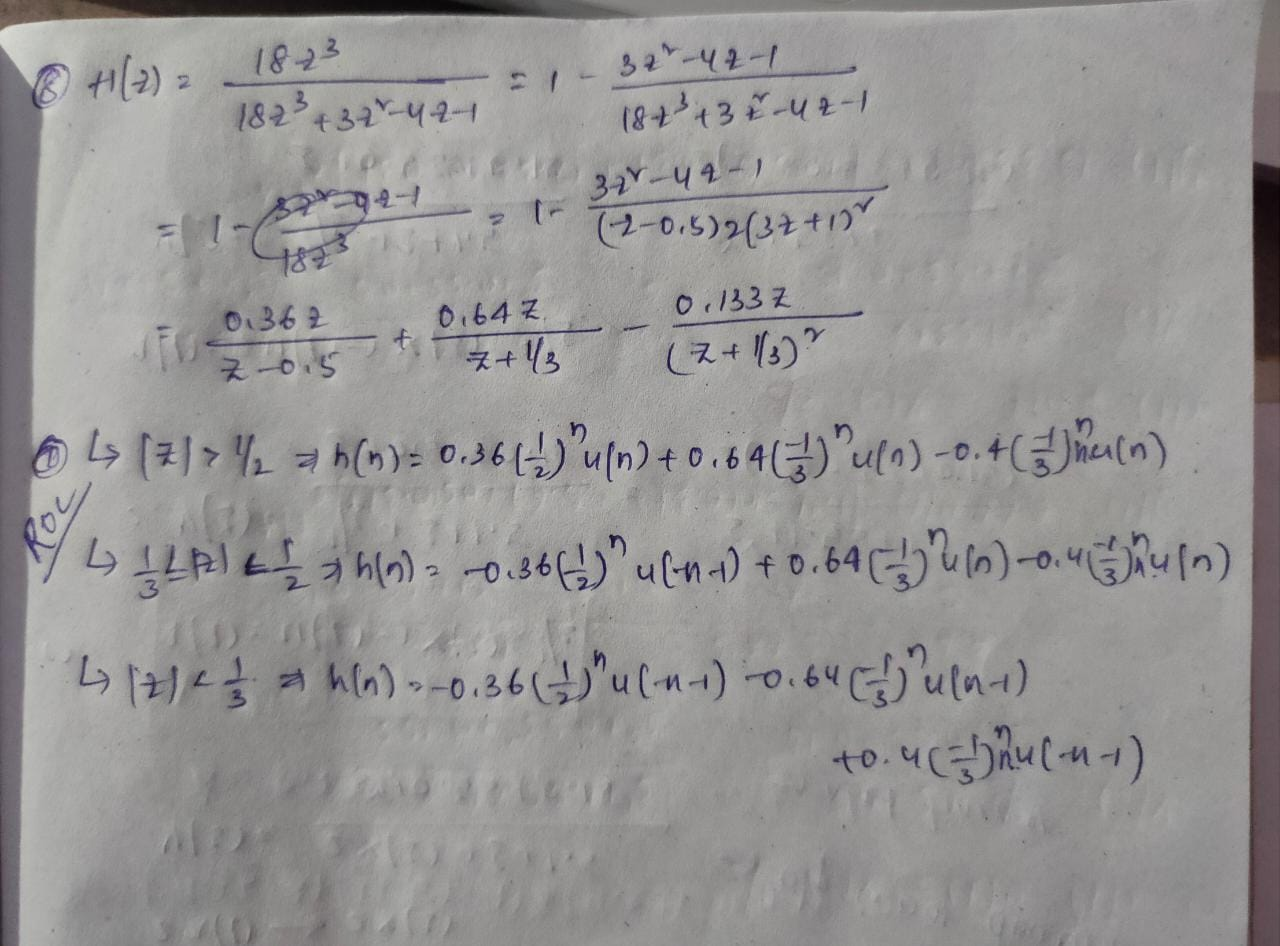

In [50]:
from IPython.display import Image
Image(filename='Q8b.jpeg',width=400, height=200)

#### Ques9

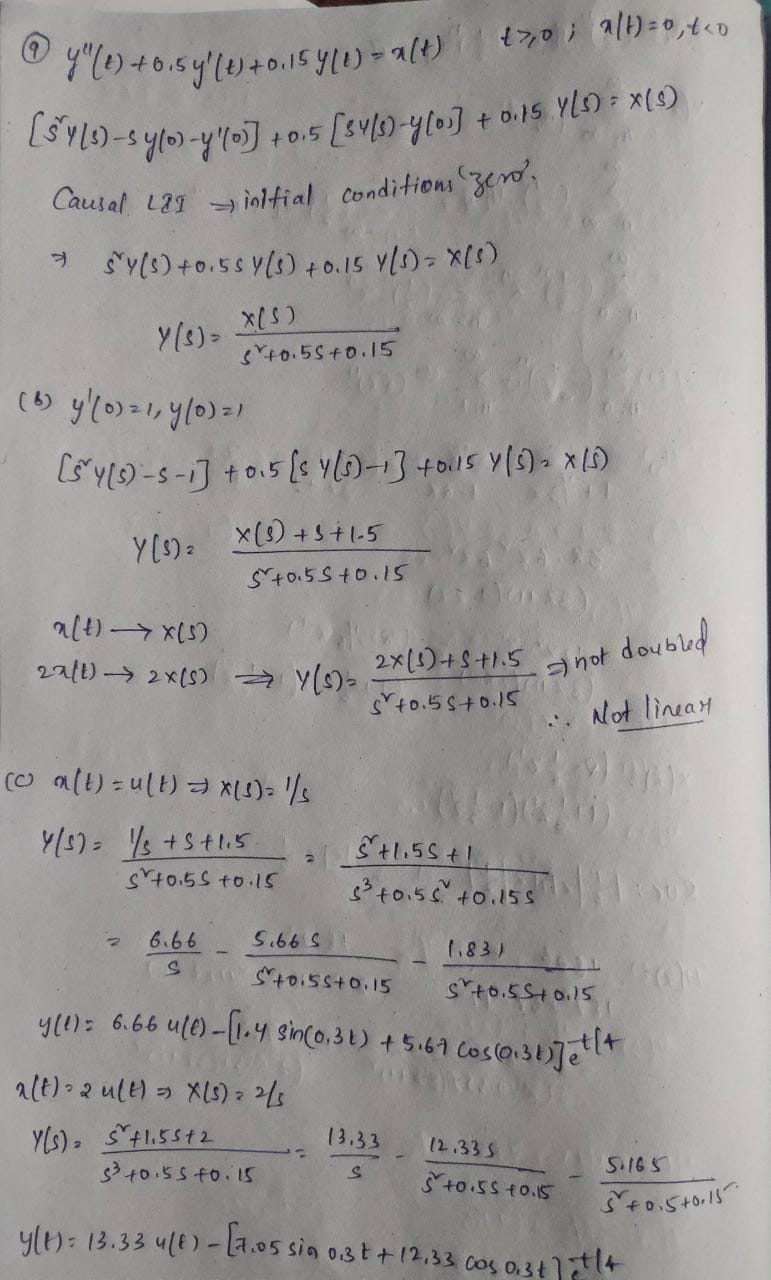

In [48]:
from IPython.display import Image
Image(filename='Q9img.jpeg',width=400, height=200)

#### Ques10

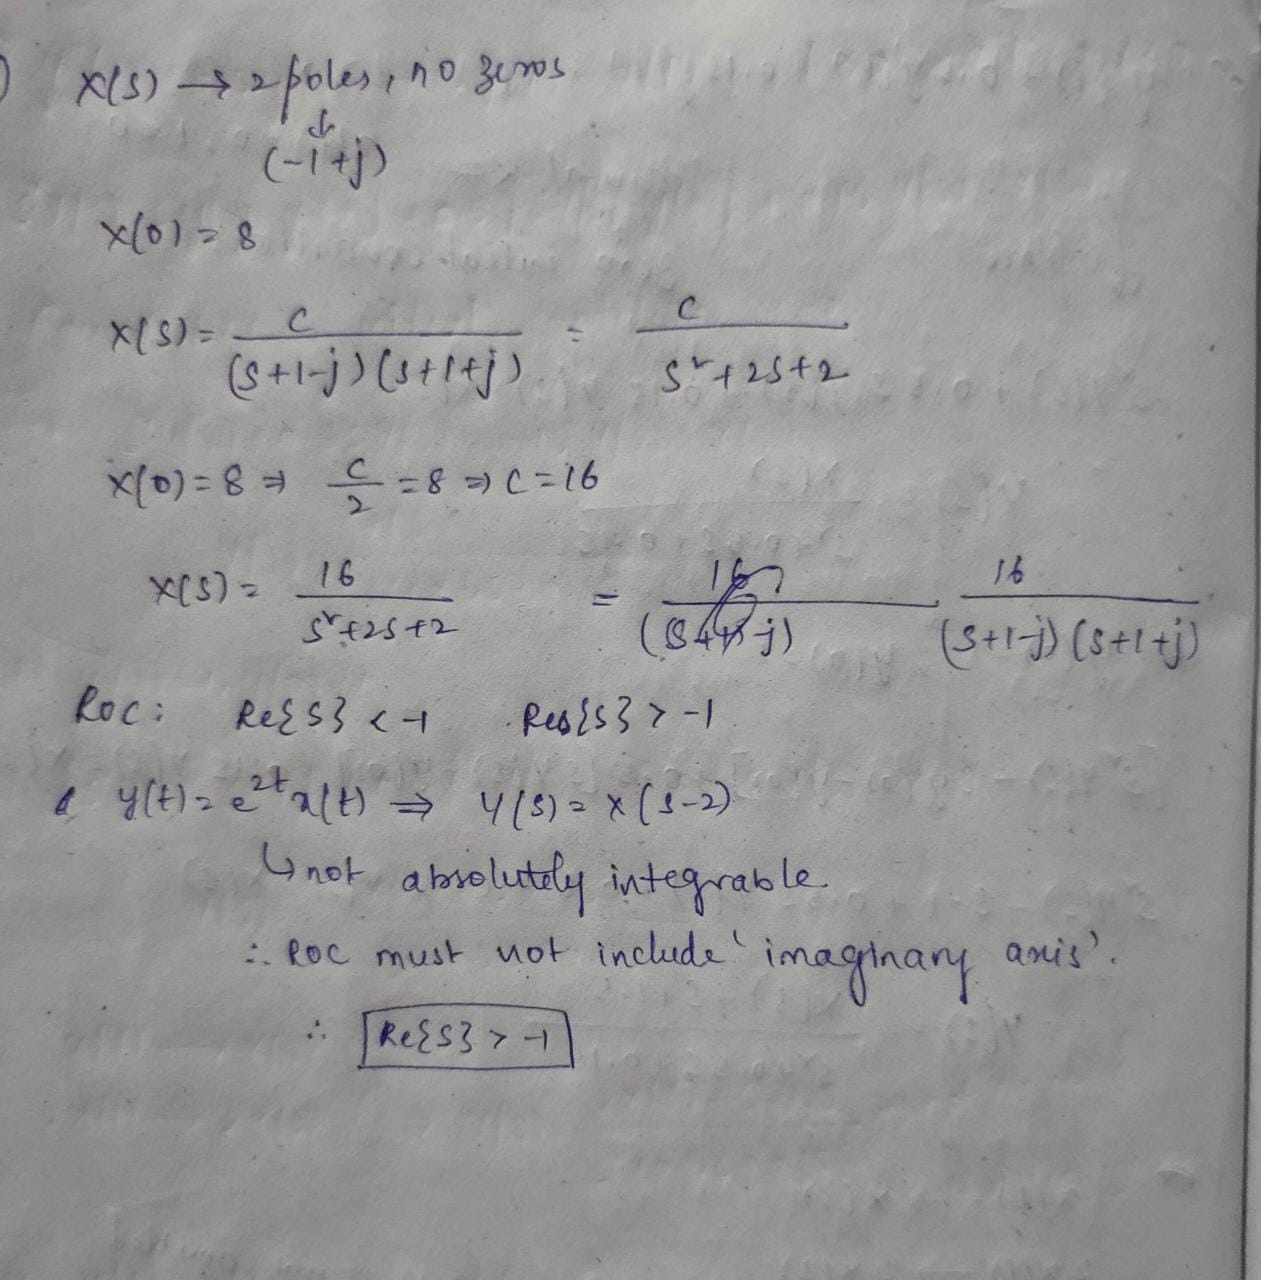

In [51]:
from IPython.display import Image
Image(filename='Q10.jpeg',width=400, height=200)